<a href="https://colab.research.google.com/github/strange-38/Advance-Data-Mining/blob/main/AdvDataMining_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

### **Read Dataset**

In [ ]:
# Read data using pandas
car_evaluation_path = "/content/car_evaluation.csv"
car_evaluation_df = pd.read_csv(car_evaluation_path)
car_evaluation_df.head()

,buying,maintenance,doors,persons,lug_boot,safety,label
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0


# **SVM**

## **(a): Train a SVM classifier with regularization parameter C = 1.0.**


In [ ]:
# Get feature and target data
feature_columns = car_evaluation_df.columns.tolist()
feature_columns.remove("label")

feature_data = car_evaluation_df[feature_columns]

target_column = "label"
target_data = car_evaluation_df[target_column]


In [ ]:
# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_test_temp, y_train, y_test_temp = train_test_split(feature_data, target_data, test_size=0.4, random_state=42)
X_vali, X_test, y_vali, y_test = train_test_split(X_test_temp, y_test_temp, test_size=0.1, random_state=42)

In [ ]:

# Train an SVM with regularization parameter C = 1
svm_model = SVC(C=1, random_state=42)
svm_model.fit(X_train, y_train)


SVC(C=1, random_state=42)

In [ ]:
# Get predicted values
y_train_pred = svm_model.predict(X_train)
y_vali_pred = svm_model.predict(X_vali)
y_test_pred = svm_model.predict(X_test)


In [ ]:
# Get accuracies
training_accuracy = accuracy_score(y_train, y_train_pred)
validation_accuracy = accuracy_score(y_vali, y_vali_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {training_accuracy:.2%}")
print(f"Validation Accuracy: {validation_accuracy:.2%}")
print(f"Test Accuracy: {testing_accuracy:.2%}")


Training Accuracy: 94.98%
Validation Accuracy: 93.41%
Test Accuracy: 97.14%


## **(b):  C in the range {$ 10^{-3}, 10^{-2}, ..., 10^2, 10^3 $}. Report (or plot) the train, validation, and test accuracy for each value of C.**

In [ ]:
# save accuracies for each corresponding C values

c_values = [10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3]
training_accuracy = list()
validation_accuracy = list()
testing_accuracy = list()

for c in c_values:
  svm_model = SVC(C=c, random_state=42)
  svm_model.fit(X_train, y_train)

  # Get predicted values
  y_train_pred = svm_model.predict(X_train)
  y_vali_pred = svm_model.predict(X_vali)
  y_test_pred = svm_model.predict(X_test)

  # Get accuracies
  training_accuracy.append(accuracy_score(y_train, y_train_pred))
  validation_accuracy.append(accuracy_score(y_vali, y_vali_pred))
  testing_accuracy.append(accuracy_score(y_test, y_test_pred))


In [ ]:
print(training_accuracy, validation_accuracy, testing_accuracy)

[0.7046332046332047, 0.7046332046332047, 0.862934362934363, 0.9498069498069498, 0.9922779922779923, 0.9980694980694981, 1.0] [0.6913183279742765, 0.6913183279742765, 0.8408360128617364, 0.9340836012861736, 0.9662379421221865, 0.9742765273311897, 0.9646302250803859] [0.7142857142857143, 0.7142857142857143, 0.8857142857142857, 0.9714285714285714, 0.9714285714285714, 1.0, 1.0]


### **Line Plot for "SVM Accuracy vs. Regularization Parameter C"**

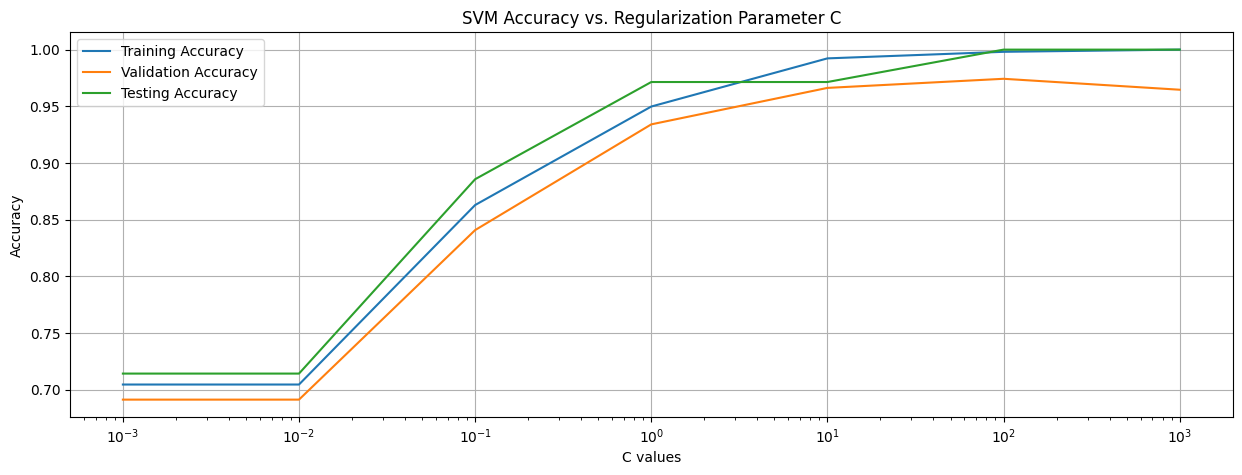

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(c_values, training_accuracy, label='Training Accuracy')
plt.plot(c_values, validation_accuracy, label='Validation Accuracy')
plt.plot(c_values, testing_accuracy, label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C values')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs. Regularization Parameter C')
plt.legend()
plt.grid(True)
plt.show()



### **Explanation:**
$$
\begin{array}{|c|c|c|c|}
\hline
\textbf{C Value} & \textbf{Training Accuracy} & \textbf{Validation Accuracy} & \textbf{Test Accuracy} \\
\hline
10^{-3} & 0.705 & 0.691 & 0.714 \\
10^{-2} & 0.705 & 0.691 & 0.714 \\
10^{-1} & 0.863 & 0.841 & 0.886 \\
10^{0} & 0.950 & 0.934 & 0.971 \\
10^{1} & 0.990 & 0.966 & 0.971 \\
10^{2} & 0.998 & 0.974 & 1.0 \\
10^{3} & 1.0 & 0.965 & 1.0 \\
\hline
\end{array}
$$


- Ideally, we prefer to choose the C value at which model shouldn't overfit, and perform better generalization. And the test and validation accuracies are close to training accuracy.

- At C=$10^{2}$, training accuracy is really high 99.8%, we might assume that the model has learnt the data so well with the outliers too, but at the same time its also performing so well on test data with 100% accuracy and also on validation data with 97.4% accuracy.

Therefore, on the provided data, **C = $10^{2}$** is likely the best choice, as it provides **the best generalization performance, balancing both validation and test accuracies.**



# **Decision Tree and Random Forest**

In [ ]:
# import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

In [ ]:
# Read data using pandas
wine_path = "/content/wine.csv"
wine_df = pd.read_csv(wine_path)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Get feature and target data
feature_columns = wine_df.columns.tolist()
feature_columns.remove("quality")
feature_data = wine_df[feature_columns]

target_column = "quality"
target_data = wine_df[target_column]


In [ ]:
# Split the data into training (70%), and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.3, random_state=42)


In [ ]:

# Train a Decision Tree Classifier with random state as 42
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Get predicted values
y_pred = dtc_model.predict(X_test)

# Calculate the confusion matrix
dtc_cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{dtc_cm}")


Confusion Matrix: 
[[  0   0   1   0   0   0]
 [  0   1  10   5   1   0]
 [  1   8 126  58   2   0]
 [  0   5  48 121  26   0]
 [  0   1   6  26  26   2]
 [  0   0   0   3   2   1]]


In [ ]:

# Calculate Precision, Recall, and F1 Score
dtc_precision = precision_score(y_test, y_pred, average='weighted')
dtc_recall = recall_score(y_test, y_pred, average='weighted')
dtc_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"DTC Model Precision: {dtc_precision*100:.2f}")
print(f"DTC Model Recall: {dtc_recall*100:.2f}")
print(f"DTC Model F1 Score: {dtc_f1*100:.2f}")

DTC Model Precision: 56.92
DTC Model Recall: 57.29
DTC Model F1 Score: 57.04


In [ ]:
dtc_cm.shape

(6, 6)

In [ ]:
dtc_cm[:, 2]

array([  1,  10, 126,  48,   6,   0])

In [ ]:
# method to calculate precision, recall and f1 score
def calculate_precision_recall_f1_score(conf_matrix: np.ndarray) -> list:
  # Calculate precision and recall for each class
  precision_per_class = list()
  recall_per_class = list()
  for cls in range(conf_matrix.shape[0]):
      truly_predicted_true_class = conf_matrix[cls, cls]
      predicted_true_class = np.sum(conf_matrix[:, cls])
      actual_true_class = np.sum(conf_matrix[cls, :])
      if truly_predicted_true_class == 0:
        precision_class, recall_class = 0, 0
      else:
        precision_class = truly_predicted_true_class / predicted_true_class
        recall_class = truly_predicted_true_class / actual_true_class
      precision_per_class.append(precision_class)
      recall_per_class.append(recall_class)

  # Calculate the occurence of true lables per class (horizontally)
  true_labels_per_class = np.sum(conf_matrix, axis=1)

  # Calculate weighted average precision
  weighted_precision = np.sum(np.array(precision_per_class) * true_labels_per_class) / np.sum(true_labels_per_class)

  # Calculate weighted average recall
  weighted_recall = np.sum(np.array(recall_per_class) * true_labels_per_class) / np.sum(true_labels_per_class)

  # Calculate f1 score
  f1_score = 2*(weighted_precision*weighted_recall)/(weighted_precision+weighted_recall)

  return dict(
      weighted_precision=weighted_precision,
      weighted_recall=weighted_recall,
      f1_score=f1_score
  )


$$ \text{Weighted Precision} = \frac{\sum_{i=1}^{n} (\text{Precision}_i \times \text{True Class}_i)}{\sum_{i=1}^{n} \text{True Class}_i} $$


In [ ]:

# Calculate weighted average precision
weighted_precision = calculate_precision_recall_f1_score(conf_matrix=dtc_cm).get("weighted_precision")
weighted_precision


0.5691909618052456

$$ \text{Weighted Recall} = \frac{\sum_{i=1}^{n} (\text{Precision}_i \times \text{True Class}_i)}{\sum_{i=1}^{n} \text{True Class}_i} $$


In [ ]:

# Calculate weighted average recall
weighted_recall = calculate_precision_recall_f1_score(conf_matrix=dtc_cm).get("weighted_recall")
weighted_recall

0.5729166666666666

$$ \text{F1 Score} = \frac{2*Precision*Recall}{Precision+Recall} $$


In [ ]:
f1_score = calculate_precision_recall_f1_score(conf_matrix=dtc_cm).get("f1_score")
f1_score

0.5710477373670305

## **(b): Using the same data and split, train a Random Forest classifier.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Confusion matrix
rf_cm = confusion_matrix(y_test, y_pred)

In [ ]:
rf_cm

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  11,   6,   0,   0],
       [  0,   0, 147,  46,   2,   0],
       [  0,   0,  46, 138,  16,   0],
       [  0,   0,   0,  32,  28,   1],
       [  0,   0,   0,   1,   4,   1]])

In [ ]:

# Calculate weighted average precision
weighted_precision = calculate_precision_recall_f1_score(conf_matrix=rf_cm).get("weighted_precision")
weighted_precision


0.6265751759087098

In [ ]:

# Calculate weighted average recall
weighted_recall = calculate_precision_recall_f1_score(conf_matrix=rf_cm).get("weighted_recall")
weighted_recall

0.6541666666666667

In [ ]:
f1_score = calculate_precision_recall_f1_score(conf_matrix=rf_cm).get("f1_score")
f1_score

0.6400737144904481

## **(c):**
- Suppose we have a dataset with 1000 negative samples and 10 positive samples, and a model was trained based on this dataset. Explain what could happen and why precision and recall would be a better evaluation metrics than accuracy in this case.

### **Explanation:**
- As, per example we have: \\
Negative Samples = 1000 \\
Positive Samples = 10

- Accuracy measures how many samples are correctly identified relative to the total number of samples.
$$ Accuracy = \frac{TP+TN}{Total Samples} $$

- On the other hand, Precision is the ratio of correctly predicted positive class and all postive predicted class.
$$ Precision = \frac{Correctly Predicted Positive Class}{Predicted Positive Class} $$


- Also, recall presents out of actual postive class available in data, how much was predicted as positive.
$$ Recall = \frac{Correctly Predicted Positive Class}{Actual Positive Class} $$


Lets, consider a random confusion matrix to understand the metrics:
$$ confMatrix = \begin{bmatrix}
1 & 9 \\
50 & 950
\end{bmatrix} $$
- TruePositive = 1 \\
- FalseNegative = 9 \\
- FalsePositive = 50 \\
- TrueNegative = 950 \\

$$ Accuracy = \frac{TP+TN}{TP+FP+FN+TN} \\
Accuracy = \frac{1+950}{1010} \\
Accuracy = 94.15\% $$

- Eventhough, just 1 sample out of 10 positive samples were correctly identified, still the accuracy is so high 94.15%. It doesn't tell which class have been correctly identified and upto what extent. So, accuracy is not a better evaluation metric.

$$ Precision = \frac {TP}{TP+FP} \\
Precision = \frac {1}{1+50} \\
Precision = 1.96\% \\ $$

- Now, Precision gives us a better idea that approximately 2% of positive predictions are correct.


$$ Recall = \frac {TP}{TP+FN} \\
Recall = \frac {1}{1+9} \\
Recall = 10\% \\ $$


 - Recall tells that just 10% of positive samples were identified correctly. \\

**In conclusion, precision and recall provide a more accurate evaluation of model performance in imbalanced datasets compared to accuracy.**


# **Bias vs Variance**

## **(a): State briefly what you understand by the bias-variance tradeoff**

- **Bias:** It's the error because of over simplification in the model.Higher bais means that model is not able to understand the underlying pattern in the data, and it oversimplifies and perform poor on both training and test datasets, causing underfitting.

- **Variance:** It's the error because of excessive complexity in the model. Higher variance means that model has become so complex and learnt not only the pattern but also all the outliers and noise so well, that it gives really high accuracy on training data, but don't perform well on the test data, causing overfitting.

- **Bias-Variance Trade Off:** It means to find a balance between bais (underfitting) and variance (overfitting) and get an optimal region, where model generalizes well to both training and testing datasets and give minimum validation error.

## **(b) : What happens to the bias and variance when the number of training samples increases?**

### **Bias:**
- Bias refers to the error occur because of over simplification in a model.
- As the **number of training samples increases, bias generally stays the same** for the given model. As it depends on how it understand the underlying pattern in data, not on the amount of data. Increasing complexity of model might affect bais and reduce it, but simply increasing training samples won't affect bias.

### **Variance:**
- Variance refers to the complexity of model based on the specific training data. High variance means the model may fit the training data very closely (overfitting), capturing noise and outliers as if it were a real pattern.

- As the **number of training samples increases**, model has more samples to learn from and it helps to reduce the risk of overfitting. Model tends to learn the actual underlying pattern in data , leading to better generalization and, **resulting in decrease variance**.

## **(c): Why does bagging improve test accuracy but slightly reduce training accuracy?**

### **Decision Tree:**
- It tends to create complex structure and memorize the actual underlying pattern with noise very well, that it gives high accuracy on training data but performs poorly on unseen or test data, resulting in overfitting.

### **Bagging:**
- It's a short form of Bootstrap Aggregating, in which we create random samples with replacement from original dataset, then its fed to multiple models of same learning algorithm. Once we get the predictions from all the models, we combine them by either taking a majority vote (for classification) or averaging the values (for regression) to determine the final prediction.

### **Explanation:**
 - When a single model of decision tree is trained on the original dataset, it learnt data with noise also giving high accuracy of 85%, but it doesn't perform well on test data, giving 72% accuracy.

- When bagging strategy is applied on 100 random samples(with replacement) of original dataset, with 100 decision tree models. Decision trees are high-variance model and tends to overfit.

    - Multiple trees are trained on different random samples of data, then aggregating the prediction removes the chances of overfit to the noise in the training data, means it won't be capturing all minor details. The resulting ensemble perfectly memorize the training data, causing the training accuracy to drop from 85% to 84%.
    - By aggregating the prediction of multiple trees, bagging helps smooth out the error that may be caused by individual tree, resulting in a model with low variance, which gives better generalization and higher accuracy on the test data. That's why the accuracy on test data increases from 72% to 78%.